In [3]:
from torchvision import datasets

cifar10 = datasets.CIFAR10("../", train=True, download=True)
cifar10_val = datasets.CIFAR10("../", train=False, download=True)

In [4]:
help(datasets.CIFAR10)

Help on class CIFAR10 in module torchvision.datasets.cifar:

class CIFAR10(torchvision.datasets.vision.VisionDataset)
 |  CIFAR10(root: Union[str, pathlib.Path], train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |
 |  `CIFAR10 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.
 |
 |  Args:
 |      root (str or ``pathlib.Path``): Root directory of dataset where directory
 |          ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
 |      train (bool, optional): If True, creates dataset from training set, otherwise
 |          creates from test set.
 |      transform (callable, optional): A function/transform that takes in a PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          target and transforms it.
 |      download (bool, optional):

In [8]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [9]:
len(cifar10)

50000

In [11]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [13]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

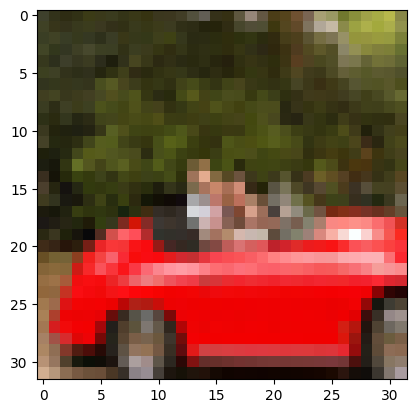

In [14]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [16]:
from torchvision import transforms

dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']